# Pymaceuticals Inc

*Sandra Mejia Avendaño*

### Pymaceuticals Inc. animal study screening for potential treatments to squamous cell calcinoma (SCC).

Summary of conditions
* Test subjects: 250 mice
* Treatments: 9 drugs + 1 placebo
* Monitoring time: 45 days
* Monitored responses: Tumor volume (mm$^{3}$) and Metastatic Sites

This analysis compares four treatments: **Capomulin, Infubinol, Ketapril, and Placebo**.


### Data gathering and organizing

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df = pd.merge(clinical_trial, mouse_drug, on="Mouse ID", how="left")

# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


---

## Tumor Response to Treatment

In [2]:
from scipy.stats import sem

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
tumor_volume = pd.DataFrame(df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean())
# Preview DataFrame
tumor_volume = tumor_volume.reset_index()
tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_sem = pd.DataFrame(df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem())
# Convert to DataFrame
tumor_volume_sem = tumor_volume_sem.reset_index()
# Preview DataFrame
tumor_volume_sem.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_rearranged = tumor_volume.pivot(index="Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
tumor_volume_rearranged.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
tumor_volume_sem_rearranged = tumor_volume_sem.pivot(index="Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
tumor_volume_sem_rearranged.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [7]:
# Generate the Plot (with Error Bars)
%matplotlib notebook


<IPython.core.display.Javascript object>


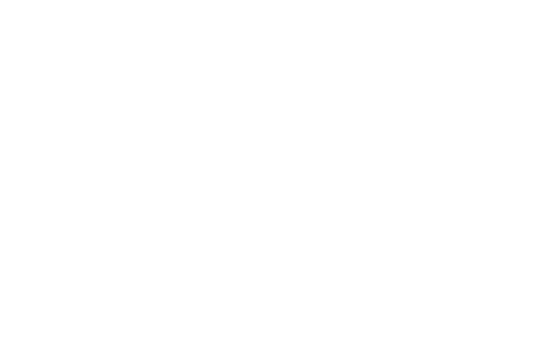

In [8]:
capomulin = plt.errorbar(tumor_volume_rearranged.index, tumor_volume_rearranged["Capomulin"],
                         yerr = tumor_volume_sem_rearranged["Capomulin"], elinewidth=1, capsize=2,
                         marker="o", color="r", linewidth = 0.5, label="Capomulin")
infubinol = plt.errorbar(tumor_volume_rearranged.index, tumor_volume_rearranged["Infubinol"], 
                         yerr = tumor_volume_sem_rearranged["Infubinol"], elinewidth=1, capsize=2,
                         marker="^", color="b", linewidth = 0.5, label="Infubinol")
ketapril = plt.errorbar(tumor_volume_rearranged.index, tumor_volume_rearranged["Ketapril"], 
                        yerr = tumor_volume_sem_rearranged["Ketapril"], elinewidth=1, capsize=2,
                        marker="s", color="g", linewidth = 0.5, label="Ketapril")
placebo = plt.errorbar(tumor_volume_rearranged.index, tumor_volume_rearranged["Placebo"], 
                       yerr = tumor_volume_sem_rearranged["Placebo"], elinewidth=1, capsize=2,
                       marker="D", color="k", linewidth = 0.5, label="Placebo")

In [9]:
tumor_volume_rearranged["Capomulin"].errorbars = yerr = tumor_volume_sem_rearranged["Capomulin"]

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm$^3$)")
plt.xlim(-3, max(tumor_volume_rearranged.index)+3)
plt.grid()
plt.legend(loc="best")

In [10]:
# Save the Figure
plt.savefig("images/TumorResponseToTreatment.png")
plt.show()

---

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
metastatic = pd.DataFrame(df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean())
metastatic = metastatic.reset_index()

# Preview DataFrame
metastatic.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
metastatic_sem = pd.DataFrame(df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem())
metastatic_sem = metastatic_sem.reset_index()

# Preview DataFrame
metastatic_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [13]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_rearranged = metastatic.pivot(index="Timepoint", columns = "Drug", values = "Metastatic Sites")

# Preview that Reformatting worked
metastatic_rearranged.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [14]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_sem_rearranged = metastatic_sem.pivot(index="Timepoint", columns = "Drug", values = "Metastatic Sites")

# Preview that Reformatting worked
metastatic_sem_rearranged.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [15]:
# Generate the Plot (with Error Bars)
%matplotlib notebook

<IPython.core.display.Javascript object>


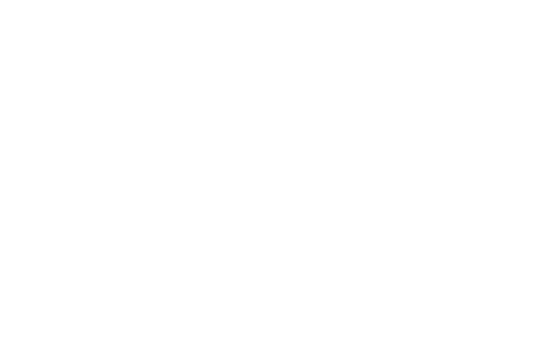

In [16]:
capomulin = plt.errorbar(metastatic_rearranged.index, metastatic_rearranged["Capomulin"],
                         yerr = metastatic_sem_rearranged["Capomulin"], elinewidth=1, capsize=2,
                         marker="o", color="r", linewidth = 0.5, label="Capomulin")
infubinol = plt.errorbar(metastatic_rearranged.index, metastatic_rearranged["Infubinol"], 
                         yerr = metastatic_sem_rearranged["Infubinol"], elinewidth=1, capsize=2,
                         marker="^", color="b", linewidth = 0.5, label="Infubinol")
ketapril = plt.errorbar(metastatic_rearranged.index, metastatic_rearranged["Ketapril"], 
                        yerr = metastatic_sem_rearranged["Ketapril"], elinewidth=1, capsize=2,
                        marker="s", color="g", linewidth = 0.5, label="Ketapril")
placebo = plt.errorbar(metastatic_rearranged.index, metastatic_rearranged["Placebo"], 
                       yerr = metastatic_sem_rearranged["Placebo"], elinewidth=1, capsize=2,
                       marker="D", color="k", linewidth = 0.5, label="Placebo")

In [17]:
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Durantion (days)")
plt.ylabel("Metastatic Sites")
plt.xlim(-3, max(tumor_volume_rearranged.index)+3)
plt.grid()
plt.legend(loc="best")

In [18]:
# Save the Figure
plt.savefig("images/MetastaticSpread.png")
plt.show()

---

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
survival = pd.DataFrame(df.groupby(["Drug", "Timepoint"])["Mouse ID"].count())
survival = survival.reset_index()
survival = survival.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
survival.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [20]:
# Minor Data Munging to Re-Format the Data Frames
survival_rearranged = survival.pivot(index="Timepoint", columns = "Drug", values = "Mouse Count")

# Preview the Data Frame
survival_rearranged.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [21]:
# Generate the Plot (Accounting for percentages)
%matplotlib notebook

<IPython.core.display.Javascript object>


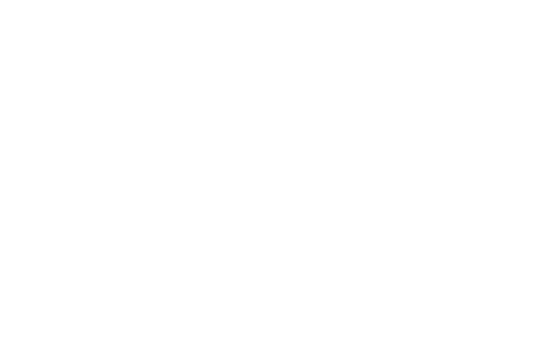

In [22]:
capomulin = plt.plot(survival_rearranged.index, 100*survival_rearranged["Capomulin"]/survival_rearranged["Capomulin"].max(),
                         marker="o", color="r", linewidth = 0.5, label="Capomulin")
infubinol = plt.plot(survival_rearranged.index, 100*survival_rearranged["Infubinol"]/survival_rearranged["Infubinol"].max(), 
                         marker="^", color="b", linewidth = 0.5, label="Infubinol")
ketapril = plt.plot(survival_rearranged.index, 100*survival_rearranged["Ketapril"]/survival_rearranged["Ketapril"].max(), 
                        marker="s", color="g", linewidth = 0.5, label="Ketapril")
placebo = plt.plot(survival_rearranged.index, 100*survival_rearranged["Placebo"]/survival_rearranged["Placebo"].max(), 
                       marker="D", color="k", linewidth = 0.5, label="Placebo")

In [23]:
plt.title("Survival During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")
plt.xlim(-3, max(tumor_volume_rearranged.index)+3)
plt.grid()
plt.legend(loc="best")

In [24]:
# Save the Figure
plt.savefig("images/Survival.png")
plt.show()

---

## Summary Bar Graph

In [25]:
# Calculate the percent changes for each drug
pivot = tumor_volume.pivot(index="Drug", columns= "Timepoint", values = "Tumor Volume (mm3)")
pivot["Change"] = 100*(pivot.iloc[:,len(pivot.columns)-1]-pivot.iloc[:,0])/pivot.iloc[:,0]
# Display the data to confirm
pivot.head()

Timepoint,0,5,10,15,20,25,30,35,40,45,Change
Drug,,,,,,,,,,,
Capomulin,45.0,44.266086,43.084291,42.064317,40.716325,39.939528,38.769339,37.816839,36.958001,36.236114,-19.475303
Ceftamin,45.0,46.503051,48.285125,50.094055,52.157049,54.287674,56.769517,58.827548,61.467895,64.132421,42.516492
Infubinol,45.0,47.062001,49.403909,51.296397,53.197691,55.715252,58.299397,60.742461,63.162824,65.755562,46.123472
Ketapril,45.0,47.389175,49.582269,52.399974,54.920935,57.678982,60.994507,63.371686,66.068580,70.662958,57.028795
Naftisol,45.0,46.796098,48.694210,50.933018,53.644087,56.731968,59.559509,62.685087,65.600754,69.265506,53.923347


In [26]:
change = pivot.loc[["Capomulin", "Infubinol", "Ketapril", "Placebo"], "Change"]
change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
Name: Change, dtype: float64

<IPython.core.display.Javascript object>


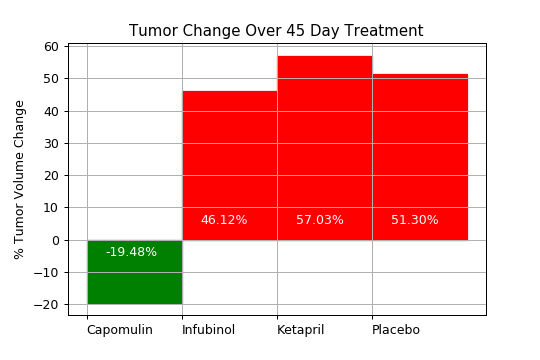

([<matplotlib.axis.XTick at 0x1fd0212b668>,
 <a list of 4 Text xticklabel objects>)

In [27]:
%matplotlib notebook
x_axis = np.arange(4)
summary_bar = plt.bar(x_axis, change, width =1, align = "edge")

plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

for bar in summary_bar:
    yval = bar.get_height()
    xval = bar.get_x()
    if yval >= 0:
        bar.set_color('r')
        plt.text(xval+0.2, 5, '{:.2f}%'.format(yval), color="w")
    else:
        bar.set_color('g')
        plt.text(xval+0.2, -5, '{:.2f}%'.format(yval), color="w")

plt.xticks(x_axis, change.index, ha='left')

In [28]:
# Save the Figure
plt.savefig("images/Summary graph.png")
plt.show()

---

### Some Observations

 * There is clearly a drug performing better than the other treatments: Capomulin.}
 * Tumor response to treatment shows a clear trend of diminishing tumor volume for the Capomulin treatment, while the other two treatments are undistinguishable from the Placebo treatment.
 * Similarly, the survival is considerably better for the Capomulin treatment, with ~85% of mice surviving the treatment, while the other treatments showed a maximum survival rate of ~45%.
 * The metastatic spread during treatment shows once more the better performance by Capomulin. 
 * Interestingly, the second best treatment when comparing Metastatic Spread is Infubinol. Infubitol results in increased Metastatic sites compared to Capomulin, but significantly less than the Placebo treatment. However, Infubitol also displays a lower survival rate than Placebo. It is possible that Infubinol is a somewhat effective drug, but its adverse effects outweigh its benefits.
 * Capomulin is clearly a better choice in every aspect: increased survival rate, decreased metastatic sites, and mostly decreased Tumor volume.

&#9724;